In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import signal
from matplotlib.pyplot import figure
import scipy.signal
import neurokit2 as nk
import plotly.express as px
from shapely.geometry import Polygon
import plotly.graph_objects as go
from PIL import Image
from tqdm import tqdm

from func import *

---

# СОЗДАНИЕ POINTCLOUD ДАТАСЕТА:

In [2]:
path_dataset = '../dataset/Dataset_larger_1250/FULL_DATA'
total_shapes = []
for num in [2,3,4,5,6,7,8]:
    print('Период номер', num)
    shapes = []
    for filename in tqdm(os.listdir(path_dataset)):
        if filename.endswith('.edf'):  # Фильтр по типу файлов
            file_path = os.path.join(path_dataset, filename)
            input ={}
            input["data_edf"] = file_path
            input["n_term_start"] = num
            input["n_term_finish"] = None
            input["filt"] = True
            input["f_sreza"] = 0.7
            input["f_sampling"] = 1000
            input["logs"] = False
            input["show_ecg"] = False
            input["plot_3d"] = False
            input["qrs_loop_area"] = False
            input["t_loop_area"] = False
            input["count_qrst_angle"] = False
            input["save_coord"] = True
            input["predict"] = False
            input["mean_filter"] = False
            input["plot_projections"] = False
            input["pr_delta"] = 0.5
            input["show_xyz"] = False
            res = get_VECG(input)
            if type(res) == int:
                shapes.append(res)
            else:
                #print(res['text'])
                pass
    total_shapes.append(shapes)

Период номер 2


  5%|▍         | 57/1250 [00:07<02:12,  9.00it/s]

long_QRS


  6%|▌         | 73/1250 [00:09<02:20,  8.38it/s]

long_QRS


  8%|▊         | 101/1250 [00:12<02:32,  7.56it/s]

long_QRS


  9%|▉         | 118/1250 [00:14<02:00,  9.36it/s]

hypertrophy_left


 11%|█         | 134/1250 [00:16<02:06,  8.84it/s]

long_QRS


 11%|█         | 137/1250 [00:17<01:59,  9.30it/s]

long_QRS


 11%|█         | 139/1250 [00:17<02:04,  8.89it/s]

long_QRS


 12%|█▏        | 148/1250 [00:18<02:03,  8.94it/s]

long_QRS


 12%|█▏        | 155/1250 [00:19<01:54,  9.57it/s]

long_QRS
long_QRS


 13%|█▎        | 158/1250 [00:19<01:50,  9.87it/s]

long_QRS


 14%|█▎        | 170/1250 [00:20<02:05,  8.61it/s]

long_QRS


 27%|██▋       | 332/1250 [00:38<01:58,  7.72it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 27%|██▋       | 343/1250 [00:39<01:33,  9.67it/s]

long_QRS


 29%|██▉       | 363/1250 [00:41<01:26, 10.31it/s]

long_QRS


 30%|███       | 381/1250 [00:43<01:25, 10.14it/s]

long_QRS


 32%|███▏      | 402/1250 [00:45<01:25,  9.97it/s]

long_QRS


 33%|███▎      | 412/1250 [00:46<01:30,  9.25it/s]

long_QRS


 33%|███▎      | 417/1250 [00:47<01:29,  9.32it/s]

long_QRS


 34%|███▎      | 420/1250 [00:47<01:30,  9.20it/s]

long_QRS


 36%|███▌      | 447/1250 [00:50<01:29,  8.96it/s]

long_QRS
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 37%|███▋      | 461/1250 [00:52<01:24,  9.37it/s]

long_QRS


 39%|███▉      | 492/1250 [00:55<01:15, 10.10it/s]

long_QRS


 41%|████▏     | 518/1250 [00:58<01:19,  9.16it/s]

long_QRS


 43%|████▎     | 538/1250 [01:00<01:09, 10.21it/s]

long_QRS


 44%|████▍     | 551/1250 [01:02<01:14,  9.41it/s]

hypertrophy_left


 44%|████▍     | 553/1250 [01:02<01:19,  8.81it/s]

hypertrophy_left


 45%|████▍     | 562/1250 [01:03<01:10,  9.70it/s]

long_QRS


 47%|████▋     | 587/1250 [01:06<01:11,  9.25it/s]

hypertrophy_left


 47%|████▋     | 590/1250 [01:06<01:07,  9.72it/s]

long_QRS


 49%|████▉     | 612/1250 [01:08<01:05,  9.69it/s]

hypertrophy_left


 50%|████▉     | 622/1250 [01:09<01:01, 10.26it/s]

hypertrophy_left


 55%|█████▌    | 693/1250 [01:17<00:56,  9.79it/s]

long_QRS
long_QRS


 56%|█████▋    | 704/1250 [01:18<00:58,  9.27it/s]

long_QRS


 58%|█████▊    | 721/1250 [01:20<00:54,  9.74it/s]

long_QRS


 59%|█████▊    | 734/1250 [01:21<00:54,  9.54it/s]

long_QRS


 59%|█████▉    | 739/1250 [01:21<00:51,  9.91it/s]

long_QRS


 60%|█████▉    | 747/1250 [01:22<00:52,  9.62it/s]

hypertrophy_left


 62%|██████▏   | 773/1250 [01:25<00:48,  9.75it/s]

long_QRS


 63%|██████▎   | 783/1250 [01:26<00:49,  9.36it/s]

hypertrophy_left


 64%|██████▍   | 802/1250 [01:28<00:51,  8.66it/s]

hypertrophy_right


 65%|██████▌   | 818/1250 [01:30<00:44,  9.64it/s]

long_QRS


 66%|██████▋   | 830/1250 [01:31<00:42,  9.98it/s]

long_QRS


 67%|██████▋   | 842/1250 [01:33<00:44,  9.11it/s]

hypertrophy_left


 69%|██████▉   | 860/1250 [01:34<00:42,  9.26it/s]

long_QRS


 69%|██████▉   | 864/1250 [01:35<00:48,  7.91it/s]

long_QRS


 70%|██████▉   | 871/1250 [01:36<00:41,  9.24it/s]

long_QRS


 71%|███████   | 882/1250 [01:37<00:38,  9.52it/s]

long_QRS
hypertrophy_left


 71%|███████▏  | 891/1250 [01:38<00:38,  9.28it/s]

long_QRS


 72%|███████▏  | 902/1250 [01:39<00:37,  9.32it/s]

long_QRS


 74%|███████▍  | 929/1250 [01:42<00:37,  8.61it/s]

long_QRS


 75%|███████▍  | 933/1250 [01:43<00:32,  9.73it/s]

long_QRS


 78%|███████▊  | 974/1250 [01:47<00:28,  9.54it/s]

long_QRS


 89%|████████▉ | 1118/1250 [02:02<00:12, 10.18it/s]

long_QRS


 93%|█████████▎| 1157/1250 [02:06<00:10,  9.15it/s]

hypertrophy_left


 95%|█████████▌| 1189/1250 [02:09<00:05, 10.22it/s]

hypertrophy_left


 98%|█████████▊| 1226/1250 [02:13<00:02,  9.33it/s]

error in long_QRS


 99%|█████████▉| 1235/1250 [02:14<00:01,  8.44it/s]

hypertrophy_right


100%|██████████| 1250/1250 [02:16<00:00,  9.16it/s]


Период номер 3


  5%|▍         | 58/1250 [00:06<02:03,  9.68it/s]

long_QRS


  6%|▌         | 73/1250 [00:07<02:17,  8.55it/s]

long_QRS


  8%|▊         | 101/1250 [00:11<02:28,  7.75it/s]

long_QRS


  9%|▉         | 118/1250 [00:13<02:05,  9.03it/s]

hypertrophy_left


 11%|█         | 135/1250 [00:15<02:04,  8.98it/s]

long_QRS


 11%|█         | 138/1250 [00:15<01:59,  9.31it/s]

long_QRS
long_QRS


 12%|█▏        | 149/1250 [00:16<01:54,  9.60it/s]

long_QRS


 12%|█▏        | 155/1250 [00:17<01:54,  9.57it/s]

long_QRS
long_QRS


 13%|█▎        | 158/1250 [00:17<01:54,  9.58it/s]

long_QRS


 14%|█▎        | 170/1250 [00:19<02:08,  8.39it/s]

long_QRS


 27%|██▋       | 332/1250 [00:36<02:00,  7.61it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 27%|██▋       | 342/1250 [00:37<01:34,  9.57it/s]

long_QRS


 29%|██▉       | 364/1250 [00:39<01:26, 10.24it/s]

long_QRS


 31%|███       | 382/1250 [00:41<01:28,  9.81it/s]

long_QRS


 32%|███▏      | 402/1250 [00:43<01:26,  9.80it/s]

long_QRS


 33%|███▎      | 411/1250 [00:44<01:23, 10.06it/s]

long_QRS


 33%|███▎      | 417/1250 [00:45<01:24,  9.83it/s]

long_QRS


 34%|███▎      | 419/1250 [00:45<01:33,  8.89it/s]

long_QRS


 36%|███▌      | 447/1250 [00:49<01:33,  8.59it/s]

long_QRS
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 37%|███▋      | 460/1250 [00:50<01:28,  8.90it/s]

long_QRS


 39%|███▉      | 491/1250 [00:54<01:20,  9.48it/s]

long_QRS


 41%|████▏     | 518/1250 [00:57<01:19,  9.15it/s]

long_QRS


 43%|████▎     | 538/1250 [00:59<01:11, 10.03it/s]

long_QRS


 44%|████▍     | 551/1250 [01:00<01:13,  9.48it/s]

hypertrophy_left


 44%|████▍     | 554/1250 [01:00<01:12,  9.64it/s]

hypertrophy_left


 45%|████▍     | 562/1250 [01:01<01:11,  9.66it/s]

long_QRS


 47%|████▋     | 587/1250 [01:04<01:09,  9.56it/s]

hypertrophy_left


 47%|████▋     | 589/1250 [01:04<01:09,  9.50it/s]

long_QRS


 49%|████▉     | 612/1250 [01:07<01:04,  9.82it/s]

hypertrophy_left


 50%|████▉     | 622/1250 [01:08<01:02, 10.04it/s]

hypertrophy_left


 55%|█████▌    | 693/1250 [01:15<00:59,  9.41it/s]

long_QRS
long_QRS


 56%|█████▋    | 704/1250 [01:16<00:56,  9.71it/s]

long_QRS


 58%|█████▊    | 721/1250 [01:18<00:55,  9.60it/s]

long_QRS


 59%|█████▊    | 733/1250 [01:19<00:53,  9.64it/s]

long_QRS


 59%|█████▉    | 739/1250 [01:20<00:53,  9.52it/s]

long_QRS


 60%|█████▉    | 747/1250 [01:21<00:54,  9.31it/s]

hypertrophy_left


 62%|██████▏   | 774/1250 [01:24<00:48,  9.85it/s]

long_QRS


 63%|██████▎   | 784/1250 [01:25<00:48,  9.57it/s]

hypertrophy_left


 64%|██████▍   | 802/1250 [01:27<00:51,  8.78it/s]

hypertrophy_right


 65%|██████▌   | 818/1250 [01:29<00:45,  9.56it/s]

long_QRS


 66%|██████▋   | 829/1250 [01:30<00:46,  9.14it/s]

long_QRS


 67%|██████▋   | 842/1250 [01:31<00:44,  9.07it/s]

hypertrophy_left


 69%|██████▉   | 860/1250 [01:33<00:43,  9.05it/s]

long_QRS


 69%|██████▉   | 864/1250 [01:34<00:49,  7.80it/s]

long_QRS


 70%|██████▉   | 871/1250 [01:34<00:42,  8.98it/s]

long_QRS


 71%|███████   | 882/1250 [01:36<00:38,  9.55it/s]

long_QRS
hypertrophy_left


 71%|███████   | 890/1250 [01:36<00:38,  9.43it/s]

long_QRS


 72%|███████▏  | 901/1250 [01:38<00:35,  9.96it/s]

long_QRS


 74%|███████▍  | 929/1250 [01:41<00:36,  8.87it/s]

long_QRS


 75%|███████▍  | 934/1250 [01:41<00:32,  9.74it/s]

long_QRS


 78%|███████▊  | 974/1250 [01:46<00:29,  9.27it/s]

long_QRS


 90%|████████▉ | 1119/1250 [02:01<00:12, 10.84it/s]

long_QRS


 93%|█████████▎| 1157/1250 [02:05<00:10,  8.98it/s]

hypertrophy_left


 95%|█████████▌| 1190/1250 [02:09<00:06,  9.86it/s]

hypertrophy_left


 98%|█████████▊| 1227/1250 [02:13<00:02,  9.61it/s]

error in long_QRS


 99%|█████████▉| 1235/1250 [02:13<00:01,  9.25it/s]

hypertrophy_right


100%|██████████| 1250/1250 [02:15<00:00,  9.22it/s]


Период номер 4


  5%|▍         | 57/1250 [00:06<02:05,  9.48it/s]

long_QRS


  6%|▌         | 73/1250 [00:07<02:13,  8.82it/s]

long_QRS


  8%|▊         | 101/1250 [00:11<02:29,  7.71it/s]

long_QRS


  9%|▉         | 118/1250 [00:13<02:00,  9.43it/s]

hypertrophy_left


 11%|█         | 134/1250 [00:15<02:05,  8.89it/s]

long_QRS


 11%|█         | 137/1250 [00:15<02:00,  9.21it/s]

long_QRS
long_QRS


 12%|█▏        | 148/1250 [00:16<02:00,  9.18it/s]

long_QRS


 12%|█▏        | 155/1250 [00:17<01:53,  9.68it/s]

long_QRS
long_QRS


 12%|█▏        | 156/1250 [00:17<01:56,  9.41it/s]

long_QRS


 14%|█▎        | 170/1250 [00:19<02:11,  8.20it/s]

long_QRS


 27%|██▋       | 332/1250 [00:36<01:49,  8.38it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 27%|██▋       | 343/1250 [00:37<01:36,  9.35it/s]

long_QRS


 29%|██▉       | 364/1250 [00:39<01:32,  9.57it/s]

long_QRS


 30%|███       | 381/1250 [00:41<01:29,  9.66it/s]

long_QRS


 32%|███▏      | 402/1250 [00:43<01:27,  9.69it/s]

long_QRS


 33%|███▎      | 412/1250 [00:45<01:30,  9.25it/s]

long_QRS


 33%|███▎      | 417/1250 [00:45<01:26,  9.65it/s]

long_QRS


 34%|███▎      | 419/1250 [00:45<01:33,  8.93it/s]

long_QRS


 36%|███▌      | 447/1250 [00:49<01:27,  9.21it/s]

long_QRS
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 37%|███▋      | 460/1250 [00:50<01:31,  8.62it/s]

long_QRS


 39%|███▉      | 492/1250 [00:53<01:15, 10.07it/s]

long_QRS


 41%|████▏     | 518/1250 [00:56<01:19,  9.26it/s]

long_QRS


 43%|████▎     | 538/1250 [00:59<01:11,  9.89it/s]

long_QRS


 44%|████▍     | 552/1250 [01:00<01:14,  9.35it/s]

hypertrophy_left
hypertrophy_left


 45%|████▍     | 562/1250 [01:01<01:11,  9.68it/s]

long_QRS


 47%|████▋     | 587/1250 [01:04<01:14,  8.93it/s]

hypertrophy_left


 47%|████▋     | 589/1250 [01:04<01:13,  9.05it/s]

long_QRS


 49%|████▉     | 612/1250 [01:07<01:07,  9.42it/s]

hypertrophy_left


 50%|████▉     | 622/1250 [01:08<01:05,  9.55it/s]

hypertrophy_left


 55%|█████▌    | 693/1250 [01:15<00:58,  9.49it/s]

long_QRS
long_QRS


 56%|█████▌    | 703/1250 [01:16<00:58,  9.34it/s]

long_QRS


 58%|█████▊    | 721/1250 [01:18<00:56,  9.28it/s]

long_QRS


 59%|█████▊    | 733/1250 [01:19<00:55,  9.25it/s]

long_QRS


 59%|█████▉    | 739/1250 [01:20<00:53,  9.53it/s]

long_QRS


 60%|█████▉    | 748/1250 [01:21<00:53,  9.30it/s]

hypertrophy_left


 62%|██████▏   | 773/1250 [01:24<00:47, 10.07it/s]

long_QRS


 63%|██████▎   | 784/1250 [01:25<00:48,  9.61it/s]

hypertrophy_left


 64%|██████▍   | 803/1250 [01:27<00:49,  9.11it/s]

hypertrophy_right


 66%|██████▌   | 819/1250 [01:29<00:45,  9.42it/s]

long_QRS


 66%|██████▋   | 830/1250 [01:30<00:45,  9.25it/s]

long_QRS


 67%|██████▋   | 842/1250 [01:31<00:45,  9.00it/s]

hypertrophy_left


 69%|██████▉   | 860/1250 [01:33<00:41,  9.38it/s]

long_QRS


 69%|██████▉   | 864/1250 [01:34<00:49,  7.86it/s]

long_QRS


 70%|██████▉   | 871/1250 [01:35<00:42,  8.88it/s]

long_QRS


 71%|███████   | 882/1250 [01:36<00:38,  9.53it/s]

long_QRS
hypertrophy_left


 71%|███████▏  | 891/1250 [01:37<00:38,  9.31it/s]

long_QRS


 72%|███████▏  | 901/1250 [01:38<00:34, 10.07it/s]

long_QRS


 74%|███████▍  | 929/1250 [01:41<00:37,  8.54it/s]

long_QRS


 75%|███████▍  | 933/1250 [01:41<00:33,  9.35it/s]

long_QRS


 78%|███████▊  | 974/1250 [01:46<00:28,  9.60it/s]

long_QRS


 89%|████████▉ | 1118/1250 [02:01<00:12, 10.46it/s]

long_QRS


 93%|█████████▎| 1157/1250 [02:05<00:10,  9.00it/s]

hypertrophy_left


 95%|█████████▌| 1189/1250 [02:09<00:05, 10.32it/s]

hypertrophy_left


 98%|█████████▊| 1227/1250 [02:12<00:02, 10.06it/s]

error in long_QRS


 99%|█████████▉| 1236/1250 [02:13<00:01,  9.35it/s]

hypertrophy_right


100%|██████████| 1250/1250 [02:15<00:00,  9.23it/s]


Период номер 5


  5%|▍         | 57/1250 [00:06<02:08,  9.31it/s]

long_QRS


  6%|▌         | 73/1250 [00:07<02:13,  8.80it/s]

long_QRS


  8%|▊         | 101/1250 [00:11<02:30,  7.63it/s]

long_QRS


  9%|▉         | 117/1250 [00:13<01:59,  9.45it/s]

hypertrophy_left


 11%|█         | 134/1250 [00:15<02:06,  8.82it/s]

long_QRS


 11%|█         | 137/1250 [00:15<02:00,  9.22it/s]

long_QRS


 11%|█         | 139/1250 [00:15<02:06,  8.79it/s]

long_QRS


 12%|█▏        | 148/1250 [00:16<02:17,  8.02it/s]

long_QRS


 12%|█▏        | 155/1250 [00:17<01:57,  9.35it/s]

long_QRS
long_QRS


 12%|█▏        | 156/1250 [00:17<01:59,  9.18it/s]

long_QRS


 14%|█▎        | 170/1250 [00:19<02:10,  8.28it/s]

long_QRS


 27%|██▋       | 332/1250 [00:36<01:48,  8.44it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 28%|██▊       | 344/1250 [00:37<01:37,  9.25it/s]

long_QRS


 29%|██▉       | 364/1250 [00:40<01:30,  9.82it/s]

long_QRS


 30%|███       | 381/1250 [00:41<01:28,  9.80it/s]

long_QRS


 32%|███▏      | 402/1250 [00:44<01:22, 10.25it/s]

long_QRS


 33%|███▎      | 412/1250 [00:45<01:32,  9.08it/s]

long_QRS


 33%|███▎      | 417/1250 [00:45<01:27,  9.53it/s]

long_QRS


 34%|███▎      | 420/1250 [00:46<01:33,  8.85it/s]

long_QRS


 36%|███▌      | 447/1250 [00:49<01:26,  9.25it/s]

long_QRS
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 37%|███▋      | 460/1250 [00:50<01:27,  9.06it/s]

long_QRS


 39%|███▉      | 492/1250 [00:54<01:16,  9.96it/s]

long_QRS


 41%|████▏     | 518/1250 [00:57<01:17,  9.40it/s]

long_QRS


 43%|████▎     | 539/1250 [00:59<01:12,  9.83it/s]

long_QRS


 44%|████▍     | 550/1250 [01:00<01:13,  9.50it/s]

hypertrophy_left


 44%|████▍     | 553/1250 [01:01<01:16,  9.14it/s]

hypertrophy_left


 45%|████▍     | 562/1250 [01:01<01:10,  9.73it/s]

long_QRS


 47%|████▋     | 587/1250 [01:04<01:11,  9.23it/s]

hypertrophy_left


 47%|████▋     | 589/1250 [01:04<01:12,  9.14it/s]

long_QRS


 49%|████▉     | 611/1250 [01:07<01:05,  9.76it/s]

hypertrophy_left


 50%|████▉     | 623/1250 [01:08<01:00, 10.37it/s]

hypertrophy_left


 55%|█████▌    | 693/1250 [01:15<00:57,  9.63it/s]

long_QRS
long_QRS


 56%|█████▋    | 705/1250 [01:17<00:57,  9.44it/s]

long_QRS


 58%|█████▊    | 721/1250 [01:18<00:56,  9.37it/s]

long_QRS


 59%|█████▊    | 733/1250 [01:20<00:55,  9.37it/s]

long_QRS


 59%|█████▉    | 740/1250 [01:20<00:53,  9.56it/s]

long_QRS


 60%|█████▉    | 747/1250 [01:21<00:53,  9.34it/s]

hypertrophy_left


 62%|██████▏   | 772/1250 [01:24<00:47, 10.10it/s]

long_QRS


 63%|██████▎   | 783/1250 [01:25<00:50,  9.25it/s]

hypertrophy_left


 64%|██████▍   | 803/1250 [01:27<00:50,  8.79it/s]

hypertrophy_right


 65%|██████▌   | 818/1250 [01:29<00:46,  9.35it/s]

long_QRS


 66%|██████▋   | 830/1250 [01:30<00:44,  9.49it/s]

long_QRS


 67%|██████▋   | 842/1250 [01:32<00:44,  9.19it/s]

hypertrophy_left


 69%|██████▉   | 860/1250 [01:34<00:41,  9.35it/s]

long_QRS


 69%|██████▉   | 864/1250 [01:34<00:47,  8.07it/s]

long_QRS


 70%|██████▉   | 871/1250 [01:35<00:42,  8.88it/s]

long_QRS


 71%|███████   | 883/1250 [01:36<00:36, 10.00it/s]

long_QRS
hypertrophy_left


 71%|███████▏  | 891/1250 [01:37<00:38,  9.33it/s]

long_QRS


 72%|███████▏  | 901/1250 [01:38<00:35,  9.71it/s]

long_QRS


 74%|███████▍  | 930/1250 [01:41<00:35,  9.06it/s]

long_QRS


 75%|███████▍  | 934/1250 [01:42<00:34,  9.09it/s]

long_QRS


 78%|███████▊  | 975/1250 [01:46<00:29,  9.47it/s]

long_QRS


 90%|████████▉ | 1119/1250 [02:01<00:12, 10.63it/s]

long_QRS


 93%|█████████▎| 1157/1250 [02:05<00:10,  8.80it/s]

hypertrophy_left


 95%|█████████▌| 1189/1250 [02:09<00:05, 10.26it/s]

hypertrophy_left


 98%|█████████▊| 1227/1250 [02:13<00:02,  9.77it/s]

error in long_QRS


 99%|█████████▉| 1235/1250 [02:13<00:01,  9.17it/s]

hypertrophy_right


100%|██████████| 1250/1250 [02:15<00:00,  9.23it/s]


Период номер 6


  5%|▍         | 57/1250 [00:06<02:07,  9.39it/s]

long_QRS


  6%|▌         | 73/1250 [00:07<02:14,  8.78it/s]

long_QRS


  8%|▊         | 101/1250 [00:11<02:33,  7.49it/s]

long_QRS


  9%|▉         | 118/1250 [00:13<02:04,  9.12it/s]

hypertrophy_left


 11%|█         | 134/1250 [00:15<02:04,  8.95it/s]

long_QRS


 11%|█         | 137/1250 [00:15<02:00,  9.25it/s]

long_QRS


 11%|█         | 139/1250 [00:15<01:59,  9.26it/s]

long_QRS


 12%|█▏        | 149/1250 [00:16<01:53,  9.67it/s]

long_QRS


 12%|█▏        | 155/1250 [00:17<01:54,  9.52it/s]

long_QRS
long_QRS


 13%|█▎        | 157/1250 [00:17<01:54,  9.55it/s]

long_QRS


 14%|█▎        | 170/1250 [00:19<02:13,  8.07it/s]

long_QRS


 27%|██▋       | 332/1250 [00:36<01:55,  7.93it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 27%|██▋       | 343/1250 [00:37<01:37,  9.35it/s]

long_QRS


 29%|██▉       | 364/1250 [00:40<01:28,  9.99it/s]

long_QRS


 30%|███       | 380/1250 [00:41<01:25, 10.14it/s]

long_QRS


 32%|███▏      | 403/1250 [00:44<01:24, 10.04it/s]

long_QRS


 33%|███▎      | 412/1250 [00:45<01:31,  9.13it/s]

long_QRS


 33%|███▎      | 418/1250 [00:45<01:26,  9.59it/s]

long_QRS


 34%|███▎      | 420/1250 [00:46<01:34,  8.82it/s]

long_QRS


 36%|███▌      | 447/1250 [00:49<01:26,  9.32it/s]

long_QRS
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 37%|███▋      | 461/1250 [00:50<01:25,  9.26it/s]

long_QRS


 39%|███▉      | 492/1250 [00:54<01:17,  9.78it/s]

long_QRS


 41%|████▏     | 518/1250 [00:57<01:20,  9.07it/s]

long_QRS


 43%|████▎     | 538/1250 [00:59<01:12,  9.87it/s]

long_QRS


 44%|████▍     | 551/1250 [01:00<01:12,  9.71it/s]

hypertrophy_left


 44%|████▍     | 553/1250 [01:00<01:13,  9.54it/s]

hypertrophy_left


 45%|████▌     | 563/1250 [01:02<01:13,  9.30it/s]

long_QRS


 47%|████▋     | 588/1250 [01:04<01:10,  9.39it/s]

hypertrophy_left
long_QRS


 49%|████▉     | 611/1250 [01:07<01:02, 10.19it/s]

hypertrophy_left


 50%|████▉     | 623/1250 [01:08<01:01, 10.24it/s]

hypertrophy_left


 55%|█████▌    | 693/1250 [01:15<00:58,  9.54it/s]

long_QRS
long_QRS


 56%|█████▌    | 703/1250 [01:16<00:58,  9.42it/s]

long_QRS


 58%|█████▊    | 722/1250 [01:18<00:55,  9.44it/s]

long_QRS


 59%|█████▊    | 734/1250 [01:20<00:56,  9.20it/s]

long_QRS


 59%|█████▉    | 740/1250 [01:20<00:51,  9.81it/s]

long_QRS


 60%|█████▉    | 747/1250 [01:21<00:53,  9.38it/s]

hypertrophy_left


 62%|██████▏   | 773/1250 [01:24<00:47,  9.98it/s]

long_QRS


 63%|██████▎   | 782/1250 [01:25<00:49,  9.47it/s]

hypertrophy_left


 64%|██████▍   | 802/1250 [01:27<00:51,  8.71it/s]

hypertrophy_right


 65%|██████▌   | 818/1250 [01:29<00:45,  9.43it/s]

long_QRS


 66%|██████▋   | 830/1250 [01:30<00:44,  9.41it/s]

long_QRS


 67%|██████▋   | 842/1250 [01:31<00:45,  8.93it/s]

hypertrophy_left


 69%|██████▉   | 860/1250 [01:33<00:43,  9.05it/s]

long_QRS


 69%|██████▉   | 864/1250 [01:34<00:52,  7.29it/s]

long_QRS


 70%|██████▉   | 872/1250 [01:35<00:35, 10.64it/s]

long_QRS


 71%|███████   | 882/1250 [01:36<00:37,  9.75it/s]

long_QRS
hypertrophy_left


 71%|███████▏  | 891/1250 [01:37<00:39,  9.06it/s]

long_QRS


 72%|███████▏  | 902/1250 [01:38<00:39,  8.89it/s]

long_QRS


 74%|███████▍  | 929/1250 [01:41<00:41,  7.77it/s]

long_QRS


 75%|███████▍  | 934/1250 [01:42<00:34,  9.14it/s]

long_QRS


 78%|███████▊  | 973/1250 [01:46<00:28,  9.61it/s]

long_QRS


 90%|████████▉ | 1119/1250 [02:01<00:12, 10.87it/s]

long_QRS


 93%|█████████▎| 1157/1250 [02:05<00:09,  9.36it/s]

hypertrophy_left


 95%|█████████▌| 1190/1250 [02:09<00:05, 10.16it/s]

hypertrophy_left


 98%|█████████▊| 1227/1250 [02:13<00:02,  9.19it/s]

error in long_QRS


 99%|█████████▉| 1235/1250 [02:14<00:01,  8.94it/s]

hypertrophy_right


100%|██████████| 1250/1250 [02:15<00:00,  9.22it/s]


Период номер 7


  5%|▍         | 57/1250 [00:06<02:07,  9.34it/s]

long_QRS


  6%|▌         | 73/1250 [00:07<02:13,  8.79it/s]

long_QRS


  8%|▊         | 101/1250 [00:11<02:28,  7.72it/s]

long_QRS


  9%|▉         | 118/1250 [00:13<02:04,  9.11it/s]

hypertrophy_left


 11%|█         | 134/1250 [00:15<02:07,  8.78it/s]

long_QRS


 11%|█         | 137/1250 [00:15<01:58,  9.37it/s]

long_QRS


 11%|█         | 139/1250 [00:15<02:00,  9.22it/s]

long_QRS


 12%|█▏        | 148/1250 [00:16<02:05,  8.81it/s]

long_QRS


 12%|█▏        | 155/1250 [00:17<01:55,  9.50it/s]

long_QRS
long_QRS


 12%|█▏        | 156/1250 [00:17<01:53,  9.60it/s]

long_QRS


 14%|█▎        | 170/1250 [00:19<02:07,  8.46it/s]

long_QRS


 27%|██▋       | 332/1250 [00:36<01:55,  7.96it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 27%|██▋       | 343/1250 [00:38<01:37,  9.34it/s]

long_QRS


 29%|██▉       | 364/1250 [00:40<01:31,  9.68it/s]

long_QRS


 31%|███       | 382/1250 [00:42<01:26, 10.05it/s]

long_QRS


 32%|███▏      | 402/1250 [00:44<01:25,  9.88it/s]

long_QRS


 33%|███▎      | 412/1250 [00:45<01:30,  9.23it/s]

long_QRS


 33%|███▎      | 417/1250 [00:46<01:26,  9.61it/s]

long_QRS


 34%|███▎      | 420/1250 [00:46<01:29,  9.27it/s]

long_QRS


 36%|███▌      | 447/1250 [00:49<01:31,  8.79it/s]

long_QRS
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 37%|███▋      | 461/1250 [00:51<01:25,  9.22it/s]

long_QRS


 39%|███▉      | 492/1250 [00:54<01:18,  9.64it/s]

long_QRS


 41%|████▏     | 518/1250 [00:57<01:20,  9.06it/s]

long_QRS


 43%|████▎     | 538/1250 [00:59<01:14,  9.55it/s]

long_QRS


 44%|████▍     | 551/1250 [01:01<01:15,  9.30it/s]

hypertrophy_left
hypertrophy_left


 45%|████▌     | 563/1250 [01:02<01:11,  9.57it/s]

long_QRS


 47%|████▋     | 587/1250 [01:05<01:14,  8.89it/s]

hypertrophy_left


 47%|████▋     | 590/1250 [01:05<01:11,  9.20it/s]

long_QRS


 49%|████▉     | 612/1250 [01:07<01:05,  9.79it/s]

hypertrophy_left


 50%|████▉     | 622/1250 [01:08<01:02, 10.06it/s]

hypertrophy_left


 55%|█████▌    | 692/1250 [01:16<00:57,  9.69it/s]

long_QRS
long_QRS


 56%|█████▋    | 705/1250 [01:17<00:56,  9.61it/s]

long_QRS


 58%|█████▊    | 721/1250 [01:19<00:55,  9.48it/s]

long_QRS


 59%|█████▊    | 732/1250 [01:20<00:55,  9.39it/s]

long_QRS


 59%|█████▉    | 738/1250 [01:21<00:52,  9.79it/s]

long_QRS


 60%|█████▉    | 748/1250 [01:22<00:54,  9.20it/s]

hypertrophy_left


 62%|██████▏   | 773/1250 [01:24<00:46, 10.26it/s]

long_QRS


 63%|██████▎   | 784/1250 [01:25<00:48,  9.57it/s]

hypertrophy_left


 64%|██████▍   | 801/1250 [01:27<00:53,  8.34it/s]

hypertrophy_right


 66%|██████▌   | 819/1250 [01:29<00:45,  9.47it/s]

long_QRS


 66%|██████▋   | 830/1250 [01:31<00:42,  9.79it/s]

long_QRS


 67%|██████▋   | 842/1250 [01:32<00:50,  8.01it/s]

hypertrophy_left


 69%|██████▉   | 860/1250 [01:34<00:43,  8.90it/s]

long_QRS


 69%|██████▉   | 864/1250 [01:35<00:49,  7.74it/s]

long_QRS


 70%|██████▉   | 871/1250 [01:35<00:42,  8.91it/s]

long_QRS


 71%|███████   | 882/1250 [01:36<00:37,  9.71it/s]

long_QRS
hypertrophy_left


 71%|███████▏  | 891/1250 [01:37<00:37,  9.61it/s]

long_QRS


 72%|███████▏  | 901/1250 [01:38<00:34, 10.03it/s]

long_QRS


 74%|███████▍  | 930/1250 [01:42<00:35,  8.90it/s]

long_QRS


 75%|███████▍  | 934/1250 [01:42<00:32,  9.71it/s]

long_QRS


 78%|███████▊  | 974/1250 [01:47<00:29,  9.42it/s]

long_QRS


 89%|████████▉ | 1118/1250 [02:02<00:12, 10.36it/s]

long_QRS


 93%|█████████▎| 1157/1250 [02:07<00:10,  8.94it/s]

hypertrophy_left


 95%|█████████▌| 1189/1250 [02:10<00:06, 10.16it/s]

hypertrophy_left


 98%|█████████▊| 1226/1250 [02:14<00:02,  9.77it/s]

error in long_QRS


 99%|█████████▉| 1235/1250 [02:15<00:01,  9.35it/s]

hypertrophy_right


100%|██████████| 1250/1250 [02:16<00:00,  9.13it/s]


Период номер 8


  5%|▍         | 57/1250 [00:06<02:09,  9.22it/s]

long_QRS


  6%|▌         | 73/1250 [00:07<02:16,  8.63it/s]

long_QRS


  8%|▊         | 101/1250 [00:11<02:33,  7.47it/s]

long_QRS


  9%|▉         | 118/1250 [00:13<02:06,  8.98it/s]

hypertrophy_left


 11%|█         | 134/1250 [00:15<02:08,  8.67it/s]

long_QRS


 11%|█         | 138/1250 [00:15<01:59,  9.32it/s]

long_QRS
long_QRS


 12%|█▏        | 148/1250 [00:17<02:01,  9.04it/s]

long_QRS


 12%|█▏        | 155/1250 [00:17<02:00,  9.12it/s]

long_QRS
long_QRS


 13%|█▎        | 158/1250 [00:18<01:54,  9.56it/s]

long_QRS


 14%|█▎        | 170/1250 [00:19<02:12,  8.17it/s]

long_QRS


 27%|██▋       | 332/1250 [00:37<01:54,  8.04it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 27%|██▋       | 343/1250 [00:38<01:37,  9.32it/s]

long_QRS


 29%|██▉       | 364/1250 [00:40<01:30,  9.79it/s]

long_QRS


 30%|███       | 381/1250 [00:42<01:31,  9.53it/s]

long_QRS


 32%|███▏      | 403/1250 [00:44<01:26,  9.77it/s]

long_QRS


 33%|███▎      | 412/1250 [00:45<01:32,  9.02it/s]

long_QRS


 33%|███▎      | 418/1250 [00:46<01:23,  9.94it/s]

long_QRS


 34%|███▎      | 419/1250 [00:46<01:32,  9.01it/s]

long_QRS


 36%|███▌      | 447/1250 [00:49<01:30,  8.85it/s]

long_QRS
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 37%|███▋      | 461/1250 [00:51<01:29,  8.81it/s]

long_QRS


 39%|███▉      | 492/1250 [00:55<01:17,  9.79it/s]

long_QRS


 41%|████▏     | 518/1250 [00:58<01:22,  8.82it/s]

long_QRS


 43%|████▎     | 538/1250 [01:00<01:13,  9.64it/s]

long_QRS


 44%|████▍     | 551/1250 [01:01<01:16,  9.15it/s]

hypertrophy_left


 44%|████▍     | 553/1250 [01:01<01:16,  9.12it/s]

hypertrophy_left


 45%|████▌     | 563/1250 [01:02<01:11,  9.58it/s]

long_QRS


 47%|████▋     | 586/1250 [01:05<01:14,  8.90it/s]

hypertrophy_left


 47%|████▋     | 589/1250 [01:05<01:14,  8.89it/s]

long_QRS


 49%|████▉     | 612/1250 [01:08<01:06,  9.58it/s]

hypertrophy_left


 50%|████▉     | 623/1250 [01:09<01:02, 10.09it/s]

hypertrophy_left


 55%|█████▌    | 691/1250 [01:16<01:01,  9.03it/s]

long_QRS
long_QRS


 56%|█████▋    | 705/1250 [01:18<00:58,  9.36it/s]

long_QRS


 58%|█████▊    | 721/1250 [01:19<01:05,  8.10it/s]

long_QRS


 59%|█████▊    | 734/1250 [01:21<00:55,  9.31it/s]

long_QRS


 59%|█████▉    | 740/1250 [01:21<00:52,  9.68it/s]

long_QRS


 60%|█████▉    | 747/1250 [01:22<00:53,  9.35it/s]

hypertrophy_left


 62%|██████▏   | 773/1250 [01:25<00:48,  9.75it/s]

long_QRS


 63%|██████▎   | 784/1250 [01:26<00:50,  9.22it/s]

hypertrophy_left


 64%|██████▍   | 802/1250 [01:28<00:52,  8.58it/s]

hypertrophy_right


 65%|██████▌   | 818/1250 [01:30<00:46,  9.26it/s]

long_QRS


 66%|██████▋   | 829/1250 [01:31<00:49,  8.59it/s]

long_QRS


 67%|██████▋   | 842/1250 [01:33<00:45,  9.05it/s]

hypertrophy_left


 69%|██████▉   | 860/1250 [01:35<00:44,  8.84it/s]

long_QRS


 69%|██████▉   | 864/1250 [01:35<00:49,  7.74it/s]

long_QRS


 70%|██████▉   | 871/1250 [01:36<00:43,  8.69it/s]

long_QRS


 71%|███████   | 882/1250 [01:37<00:38,  9.61it/s]

long_QRS
hypertrophy_left


 71%|███████▏  | 891/1250 [01:38<00:39,  9.09it/s]

long_QRS


 72%|███████▏  | 901/1250 [01:39<00:34, 10.01it/s]

long_QRS


 74%|███████▍  | 929/1250 [01:43<00:43,  7.32it/s]

long_QRS


 75%|███████▍  | 934/1250 [01:44<00:35,  8.93it/s]

long_QRS


 78%|███████▊  | 974/1250 [01:48<00:30,  9.00it/s]

long_QRS


 89%|████████▉ | 1118/1250 [02:04<00:12, 10.27it/s]

long_QRS


 93%|█████████▎| 1157/1250 [02:08<00:10,  8.80it/s]

hypertrophy_left


 95%|█████████▌| 1190/1250 [02:12<00:05, 10.05it/s]

hypertrophy_left


 98%|█████████▊| 1227/1250 [02:16<00:02,  9.48it/s]

error in long_QRS


 99%|█████████▉| 1235/1250 [02:17<00:01,  9.35it/s]

hypertrophy_right


100%|██████████| 1250/1250 [02:18<00:00,  9.02it/s]


Распределение числа точек в датасете для каждого пациента:

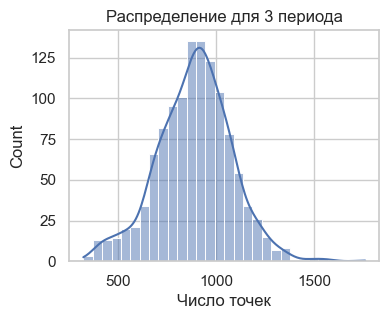

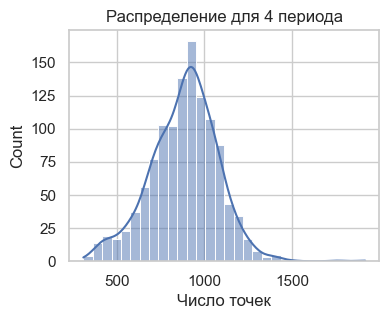

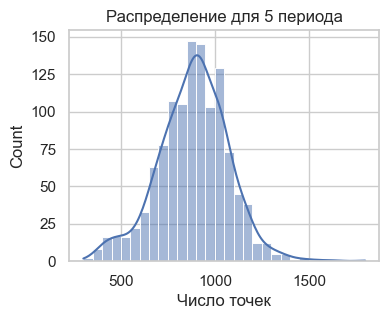

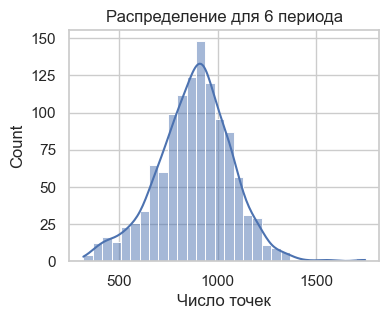

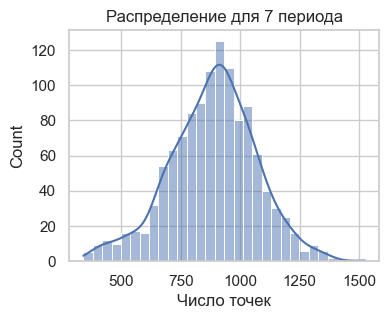

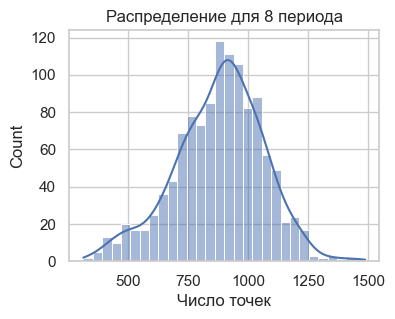

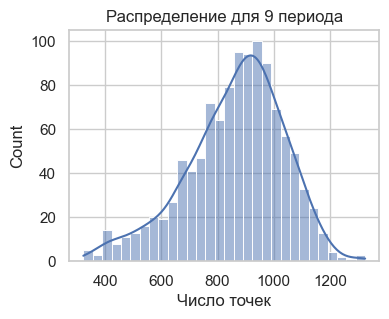

In [3]:
import seaborn as sns

for i in range(len(total_shapes)):
    sns.set(style="whitegrid")
    plt.figure(figsize=(4, 3))
    sns.histplot(x=total_shapes[i], kde=True, bins=30)
    plt.title(f"Распределение для {[3,4,5,6,7,8,9][i]} периода")
    plt.xlabel("Число точек")
    plt.show()

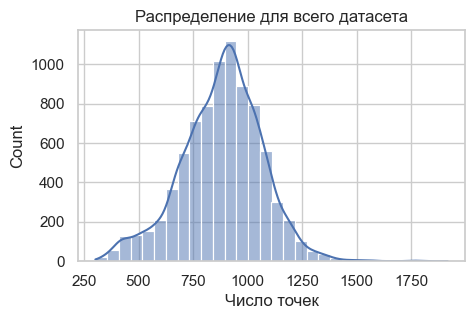

In [4]:
n_points = []
for num in total_shapes:
    n_points.extend(num)
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(x=n_points, kde=True, bins=30)
plt.title(f"Распределение для всего датасета")
plt.xlabel("Число точек")
plt.show()


In [5]:
data ={}
data["folder_dataset"] = 'point_cloud_dataset'
data["folder_save_csv"] = 'csv_folder_point_cloud'
data["auto_split"] = True
data["percent_error"] = 2
data["percent_train"] = 75
get_csv(data)

CSV таблица сохранена в папке csv_folder_point_cloud

Всего имеется 8236 кропов.
Для реализации пропорции 75/25 необходимо в файле csv_folder_point_cloud/info_dataset.csv отнести на валидацию (val) примерно 2059 кропов.

Выбран режим автоматического сплитования:
Условие рандомной генерации +-2% от требуемого 2059 числа кропов на валидацию - [2018,2100]

В результате автоматического сплитования получилось отнести на валидацию 2021 кропов
Итоговое соотношение train/val = 75/25


In [6]:
import openpyxl
df = pd.read_excel('../dataset/1250_ef.xlsx')

def func_change(value):
    return value[:-4]

df['FileID'] = df.File.apply(func_change)
df.to_excel('../dataset/1250_ef.xlsx', index=False)
df

,File,EF,FileID
0,AG1.edf,68,AG1
1,AG10.edf,60,AG10
2,AG100.edf,65,AG100
3,AG101.edf,72,AG101
4,AG102.edf,70,AG102
...,...,...,...
1245,IOMI95.edf,65,IOMI95
1246,IOMI96.edf,38,IOMI96
1247,IOMI97.edf,54,IOMI97
1248,IOMI98.edf,67,IOMI98


<Axes: >

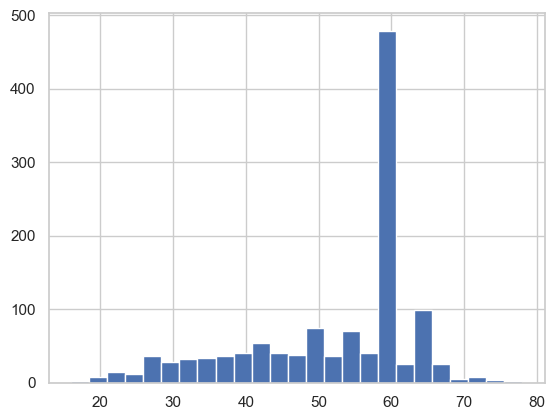

In [11]:
df.EF.hist(bins=25)

In [7]:
data = {}
data["dataset_path"] = 'point_cloud_dataset'
data["splitted_dataset_name"] = 'final_pointcloud_dataset'
data["csv_folder"] = 'csv_folder_point_cloud'
data["excel_file"] = '../dataset/1250_ef.xlsx'
split(data)

Cоздано следующее число изображений:
На train - 6215
На val - 2021 

Итоговое соотношение train/val = 75/25

Разделенный датасет расположен в папке final_pointcloud_dataset


---